In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/alura-cursos/machine_learning_chatgpt/blob/main/Dados/emprestimo.xlsx?raw=true'

dados = pd.read_excel(url)

dados.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Realizando a exploração dos dados, como forma de verificar se há valores duplicados, nulos - NaN ou qualquer outro aspecto negativo que interfira negativamente à análise dos dados.

In [3]:
df = dados.copy()

In [4]:
# Verificando se há dados nulos:

df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Verificando se há dados duplicados:

df.duplicated().sum()

# Para modelos de machine learning é importante realizar
# a análise de dados duplicados, ver se existem, pois a sua
# existência implica negativamente na construção do modelo,
# tendo em vista que gera viés, provoca menor eficiência e
# impacta de modo negativo a generalização do modelo.

0

In [6]:
# Verificando as informações básicas do df:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Dados estatísticos acerca do df:

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Visualização dos dados:

- Distribuição dos dados numéricos em relação à variável target - Personal Loan.

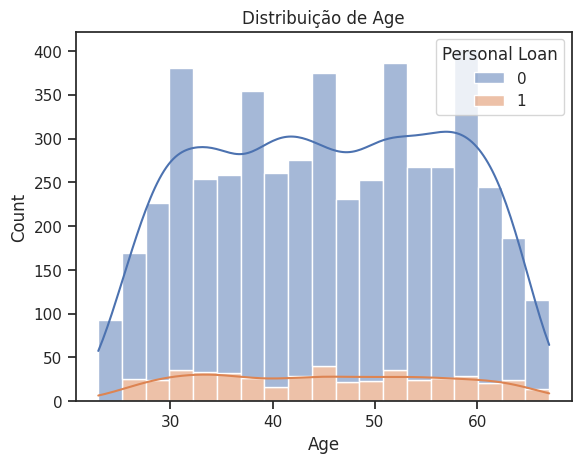

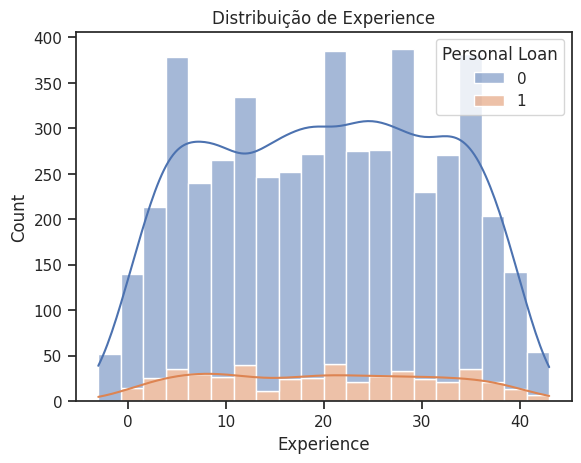

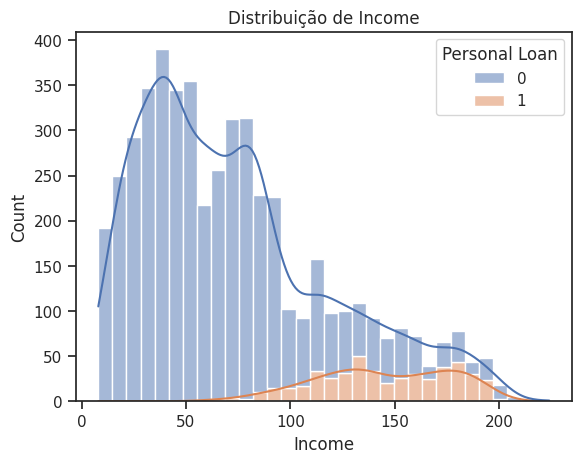

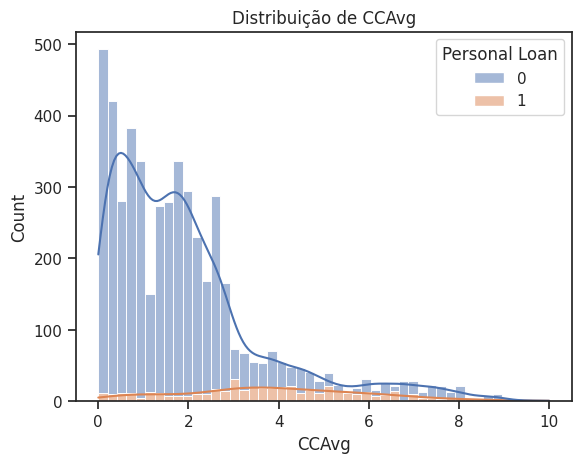

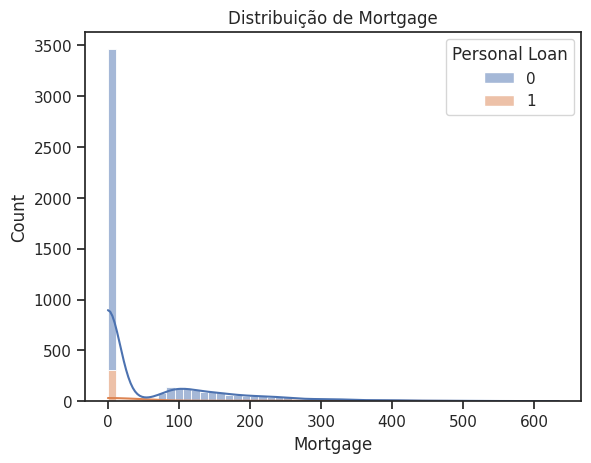

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo dos gráficos
sns.set(style="ticks")

# Colunas com valores numéricos
numeric_columns = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]

# Visualizar distribuição dos dados numéricos em relação à variável "Personal Loan"
for column in numeric_columns:
    sns.histplot(data=df, x=column, hue="Personal Loan", multiple="stack", kde=True)
    plt.title(f"Distribuição de {column}")
    plt.show()


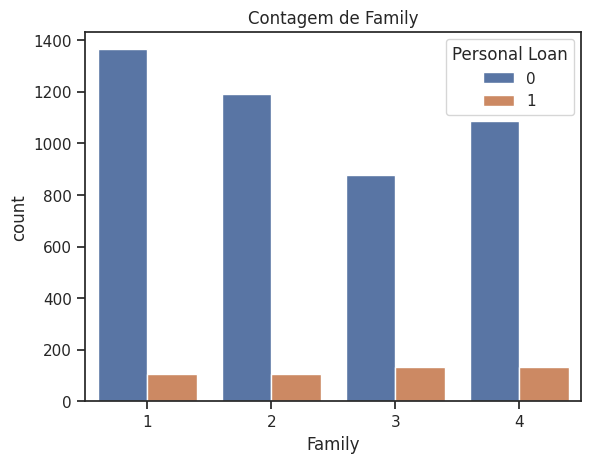

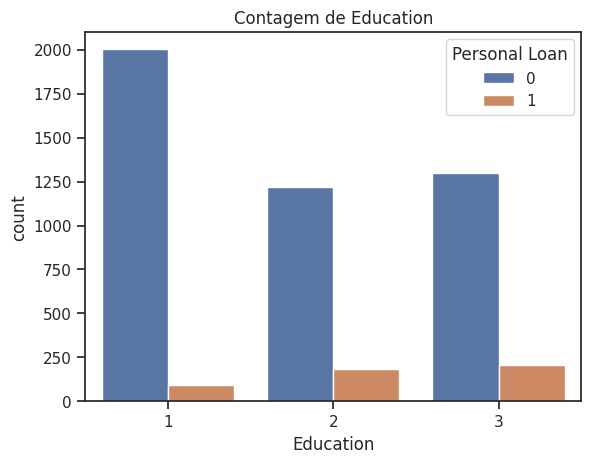

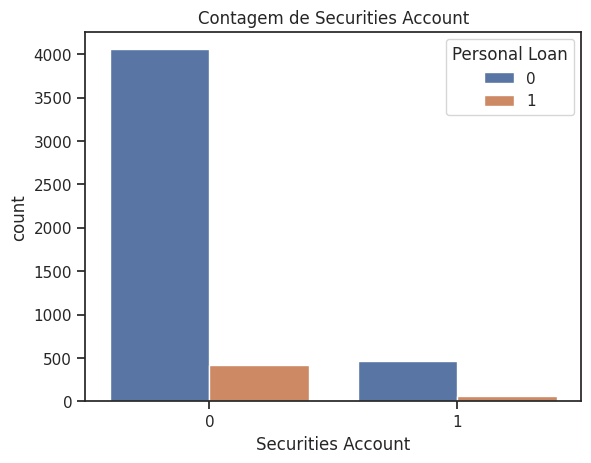

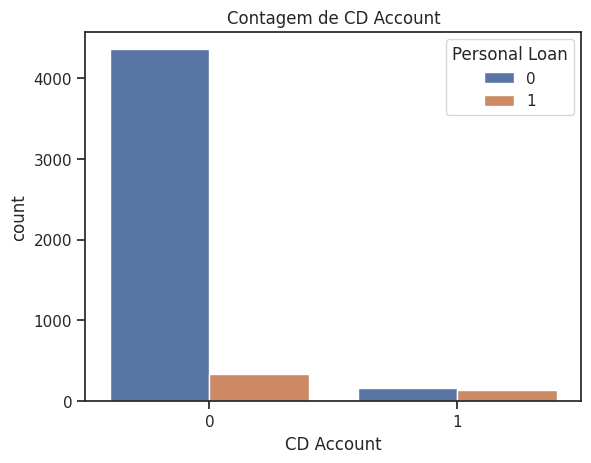

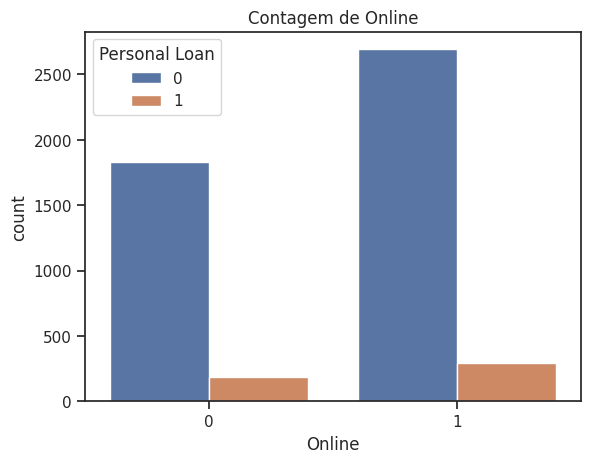

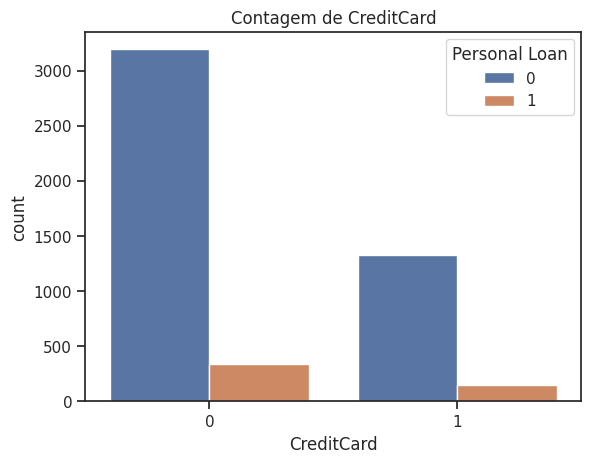

In [9]:
# Colunas com dados categóricos
categorical_columns = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]

# Visualizar quantidades dos dados categóricos em relação à variável "Personal Loan"
for column in categorical_columns:
    sns.countplot(data=df, x=column, hue="Personal Loan")
    plt.title(f"Contagem de {column}")
    plt.show()

In [10]:
# Criando um novo dataframe que não apresenta as colunas ID e Zip Code,
# pois ambas não apresentam uma relevância clara à criação de um modelo
# de machine learning

df2 = df.copy()

df2 = df2.drop(["ID", "ZIP Code"], axis=1)

df2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


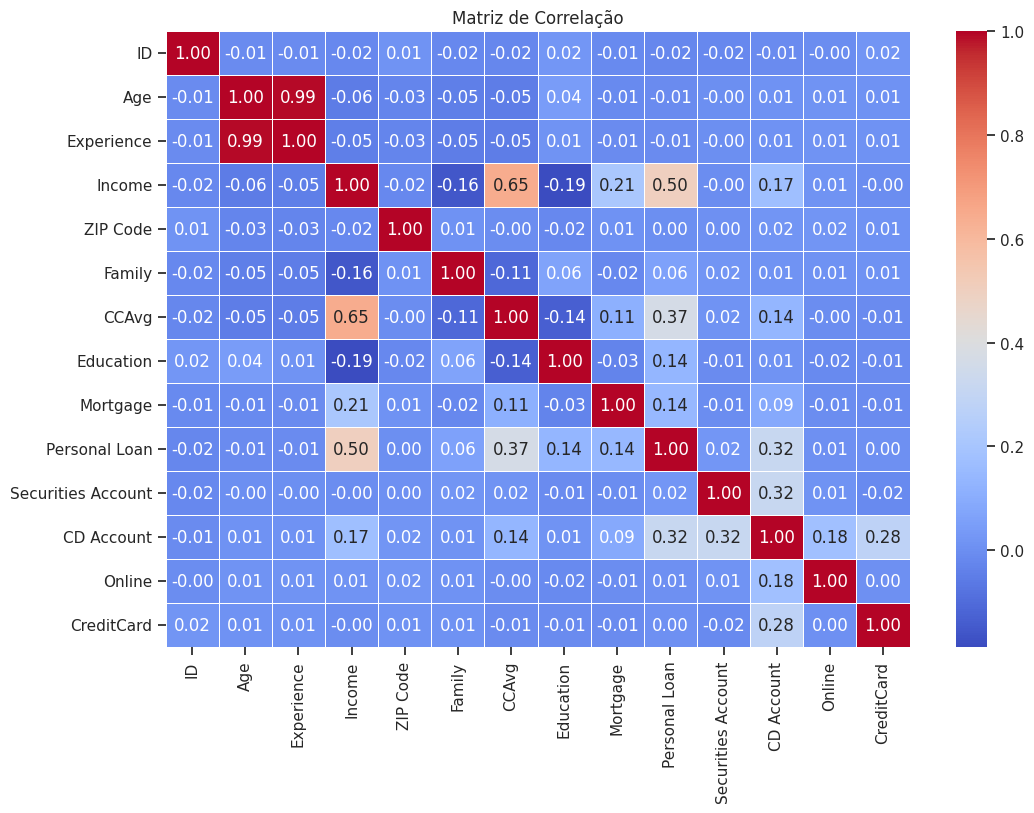

In [11]:
# Análise de correlação
correlation_matrix = df.corr()

# Mapa de calor da correlação
plt.figure(figsize=(12, 8))

# Annot=True -> mostrar os valores no mapa de calor;
# cmap -> o gradiente das cores da matriz de correlação.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [12]:
# À construção do modelo é importante analisar também dados que estejam muito
# correlacionados, pois isso pode o deixar redundante. Lembrando que correlação
# é aferida por meio de um cálculo que pode resultar em -1 ou 1, sendo o primeiro
# estritamente não correlacionadas e a primeira o oposto.

# Variáveis muito correlacionadas revelam que apresentam aspectos muito comuns
# e podem prejudicar modelos de regressão - colinearidade.

# Por outro lado, em casos de multicolinearidade, que são quando variáveis
# independentes apresentam elevada correlação entre si, a sua existência pode
# prejudicar a interpretação do modelo, pois torna difícil identificar o impacto
# de cada variável em um determinado fenômeno, podendo, inclusive, afetar a
# precisão do modelo.

# Como as variáveis Experience e Age estão muitos correlacionadas e, com isso,
# podem afetar negativamente a precisão do modelo, irei remover uma dessas, sendo
# a Age.

df2 = df2.drop(["Age"], axis=1)
df2.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


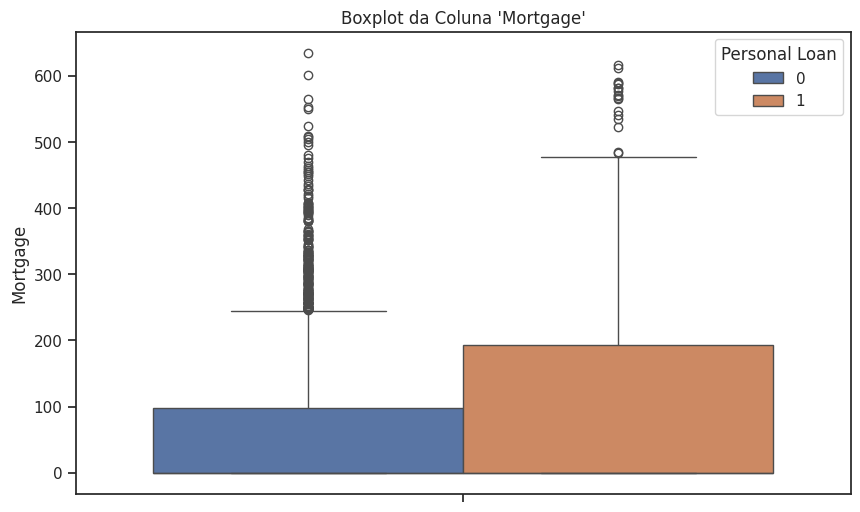

In [13]:
# Visualizando a quantidade de outiliers na coluna "Mortgage":

import seaborn as sns
import matplotlib.pyplot as plt


# Crie o boxplot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2["Mortgage"], data=df2, hue = "Personal Loan")

# Adicione um título ao gráfico
plt.title("Boxplot da Coluna 'Mortgage'")

# Mostre o gráfico
plt.show()

In [14]:
# A partir do gráfico gerado, concebeu-se que de fato há a presença
# de muitos outliers no modelo, ainda que estejam mais presentes
# no conjunto de dados daqueles que não possuem hipotéca em relação
# aos que possuem.

# Dentre uma das formas de se tratar outiliers é a utilização do método
# do Z-score, com o qual, a partir de um desvio padrão auxilia na exclusão
# de dados outiliers, assim como o intervalo interquartil.

# Z-score:

from scipy import stats

# Obter o z-score utilizando o stats:
z_score = stats.zscore(df2["Mortgage"])

z_score

0      -0.555524
1      -0.555524
2      -0.555524
3      -0.555524
4      -0.555524
          ...   
4995   -0.555524
4996    0.280238
4997   -0.555524
4998   -0.555524
4999   -0.555524
Name: Mortgage, Length: 5000, dtype: float64

In [15]:
df2.shape

(5000, 11)

In [16]:
# Armazenando os outiliers:
outliers = df2["Mortgage"][abs(z_score) > 3]

# Retirando os outliers:
df2 = df2.drop(outliers.index)

df2.shape

(4895, 11)

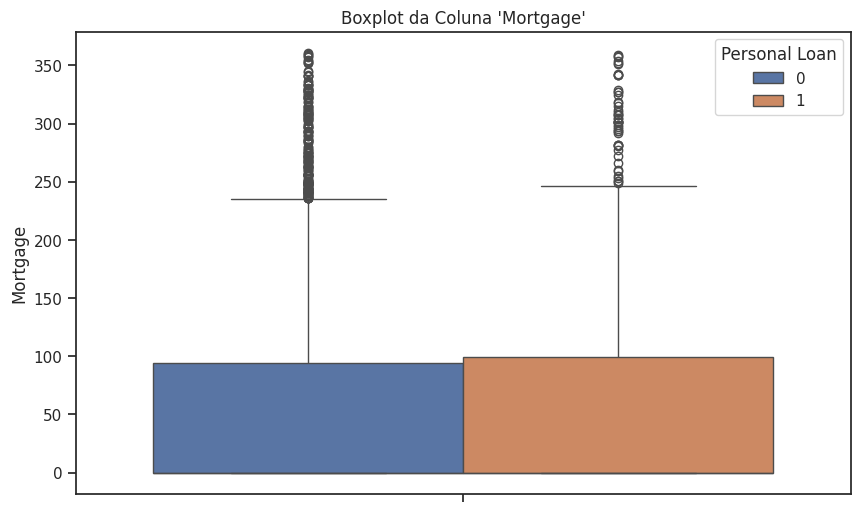

In [17]:
# Crie o boxplot usando Seaborn depois do primeiro tratamento dos outliers:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2["Mortgage"], data=df2, hue = "Personal Loan")

# Adicione um título ao gráfico
plt.title("Boxplot da Coluna 'Mortgage'")

# Mostre o gráfico
plt.show()

In [18]:
# Transformando os dados da coluna CCAvg, que estão em termos mensais.
# Preciso transformá-los, para se adequar ao dataset em anuais. Para
# tanto, basta multiplicar os valores da coluna por 12.

df2 = (df2["CCAvg"] * 12)

In [19]:
df2.head()

0    19.2
1    18.0
2    12.0
3    32.4
4    12.0
Name: CCAvg, dtype: float64

Note que na tabela eu tenho a coluna Experience, Income, Family, CCAvg, Education e Mortgage (hipoteca) e que estão em escalas diferentes. Isso para a criação de modelos de regressão e até mesmo machine learning pode ser problemático, tendo em vista que pode gerar problemas de viés, de modo que valores maiores podem receber maior peso do que outros, enviesando à análise justamente. Não obstante, a diferença na escala pode interferir negativamente na otimização do modelo. Ainda, termos na mesma escala facilita a análise dos coeficientes, caso estejam sendo usados, pelo modelo.

A vantagem de dados não escalados, porém, é quando está utilizando um modelo que concede maior peso às variáveis que apresentam maiores valores e afins. Dito isso, parece ser relevante, para a criação do modelo de machine learning, deixar os dados de tais colunas na mesma escala.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Criando um objeto que armazena a respectiva função:
scaler = MinMaxScaler()

# Ajustando e transformando as colunas desejadas:
columns_to_scale = ["Experience", "Income", "Family", "CCAvg", "Mortgage"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,0.086957,0.189815,91107,1.000000,0.16,1,0.0,0,1,0,0,0
1,2,45,0.478261,0.120370,90089,0.666667,0.15,1,0.0,0,1,0,0,0
2,3,39,0.391304,0.013889,94720,0.000000,0.10,1,0.0,0,0,0,0,0
3,4,35,0.260870,0.425926,94112,0.000000,0.27,2,0.0,0,0,0,0,0
4,5,35,0.239130,0.171296,91330,1.000000,0.10,2,0.0,0,0,0,0,1


In [21]:
df3 = df.copy()

df3 = df3.drop(["ID", "ZIP Code", "Age"], axis=1)

df3.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.086957,0.189815,1.000000,0.16,1,0.0,0,1,0,0,0
1,0.478261,0.120370,0.666667,0.15,1,0.0,0,1,0,0,0
2,0.391304,0.013889,0.000000,0.10,1,0.0,0,0,0,0,0
3,0.260870,0.425926,0.000000,0.27,2,0.0,0,0,0,0,0
4,0.239130,0.171296,1.000000,0.10,2,0.0,0,0,0,0,1


In [22]:
df3.shape

(5000, 11)

In [23]:
# Obter o z-score utilizando o stats:
z_score = stats.zscore(df3["Mortgage"])

# Armazenando os outiliers:

# O termo 3 é um cencenso de limite adotado para
# a clivagem dos outliers nos dados:

outliers = df3["Mortgage"][abs(z_score) > 3]

# Retirando os outliers:
df3 = df3.drop(outliers.index)

df3.shape

(4895, 11)

In [24]:
df3.head(10)

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.086957,0.189815,1.000000,0.16,1,0.000000,0,1,0,0,0
1,0.478261,0.120370,0.666667,0.15,1,0.000000,0,1,0,0,0
2,0.391304,0.013889,0.000000,0.10,1,0.000000,0,0,0,0,0
3,0.260870,0.425926,0.000000,0.27,2,0.000000,0,0,0,0,0
4,0.239130,0.171296,1.000000,0.10,2,0.000000,0,0,0,0,1
5,0.347826,0.097222,1.000000,0.04,2,0.244094,0,0,0,1,0
6,0.652174,0.296296,0.333333,0.15,2,0.000000,0,0,0,1,0
7,0.586957,0.064815,0.000000,0.03,3,0.000000,0,0,0,0,1
8,0.282609,0.337963,0.666667,0.06,2,0.163780,0,0,0,1,0
9,0.260870,0.796296,0.000000,0.89,3,0.000000,1,0,0,0,0


Note que agora eu tenho uma tabela normalizada, isto é, colocada numa mesma escala. A escala adotada é o MinMaxScaler, que define um intervalo de valores entre 0 e 1; porém, ainda há a coluna Education, que apresenta diferentes valores, os quais se referem a tipos de ensino. Uma forma de padronizá-la é utilizar de dummies, por meio do get_dummies.

In [25]:
# * O parâmetro prefix é o nome da coluna

df3 = pd.get_dummies(df3, columns=["Education"], prefix="Education")

df3.head()

,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,0.086957,0.189815,1.000000,0.16,0.0,0,1,0,0,0,1,0,0
1,0.478261,0.120370,0.666667,0.15,0.0,0,1,0,0,0,1,0,0
2,0.391304,0.013889,0.000000,0.10,0.0,0,0,0,0,0,1,0,0
3,0.260870,0.425926,0.000000,0.27,0.0,0,0,0,0,0,0,1,0
4,0.239130,0.171296,1.000000,0.10,0.0,0,0,0,0,1,0,1,0


- Treinando os dados:

In [26]:
from sklearn.model_selection import train_test_split

# Separando as variáveis explicativas da resposta:

X = df3.drop("Personal Loan", axis=1)
y = df3["Personal Loan"]

# Divide os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)


# Verificando se os dados foram estratificados da forma correta, como forma de
# garantir a mesma proporção dos dados. Isso é relevante quando se tem uma quantidade
# de dados desproporcionais grande entre si. No presente caso, notava-se que muitas
# pessoas não possuíam empréstimo em relação às que possuíam, o que pode prejudicar
# o modelo por conta da desproporção com isso gerada, afetando negativamente a sua
# acurácia. Para que isso não ocorra, estratifiquei os dados, com base na variável
# targer, por meio do método "stratify".

y_train.value_counts(normalize=True)*100

0    91.164454
1     8.835546
Name: Personal Loan, dtype: float64

In [27]:
y_test.value_counts(normalize=True)*100

0    91.113381
1     8.886619
Name: Personal Loan, dtype: float64

In [28]:
# A partir dos dados, nota-se que foram estratificados, garantindo
# a mesma proporção.


# Criando o primeiro modelo, que será o Dummy, que me ajudará a definir
# uma régua de comparação com o meu modelo de fato, de modo que se esse
# for superior ao primeiro ligeiramente, indica que não está bom - isso
# levando em conta a sua acurácia.

# Modelo Dummy:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Cria um modelo Dummy
dummy_model = DummyClassifier(strategy="most_frequent")

# Treina o modelo Dummy
dummy_model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_dummy = dummy_model.predict(X_test)

# Calcula a acurácia do modelo Dummy
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Criar os modelos
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Treinar os modelos com os dados de treino
logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Fazer previsões nos conjuntos de teste
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calcular as acurácias dos modelos
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Imprimir as acurácias dos modelos
print("Acurácia do Dummy Classifier: {:.2f}%".format(accuracy_dummy * 100))
print("Acurácia da Logistic Regression: {:.2f}%".format(accuracy_logreg * 100))
print("Acurácia da Decision Tree: {:.2f}%".format(accuracy_dt * 100))

Acurácia do Dummy Classifier: 91.11%
Acurácia da Logistic Regression: 96.53%
Acurácia da Decision Tree: 98.47%


Para a validação do modelo não basta saber a sua respectiva acurácia, mas também cabe uma análise por outras abordagens, tais como a matriz de confusão.

In [30]:
# Calcular as matrizes de confusão

from sklearn.metrics import confusion_matrix

conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Matriz de Confusão - Dummy Model:")
print(conf_matrix_dummy)
print("\n")

print("Matriz de Confusão - Logistic Regression Model:")
print(conf_matrix_logreg)
print("\n")

print("Matriz de Confusão - Decision Tree Model:")
print(conf_matrix_dt)


Matriz de Confusão - Dummy Model:
[[892   0]
 [ 87   0]]


Matriz de Confusão - Logistic Regression Model:
[[887   5]
 [ 29  58]]


Matriz de Confusão - Decision Tree Model:
[[884   8]
 [  7  80]]


Visualmente a matriz de confusão fica melhor de ser compreendida. Em síntese, tem-se que combinar ambas as linhas e colunas para aferir o quanto de verdadeiros positivos e falsos, cabendo o mesmo aos negativos. O melhor modelo é aquele que apresentar a menor incoerência de "proposição", ou seja, o que está mais correto em dizer "positivo" ou "falso".

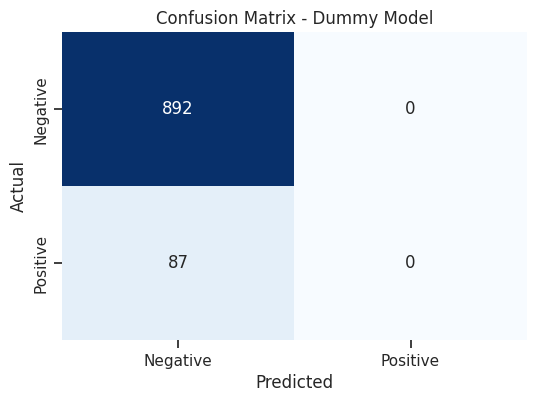

In [31]:
# Função para plotar a matriz de confusão graficamente:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plotar a matriz de confusão para cada modelo
plot_confusion_matrix(conf_matrix_dummy, 'Dummy Model')

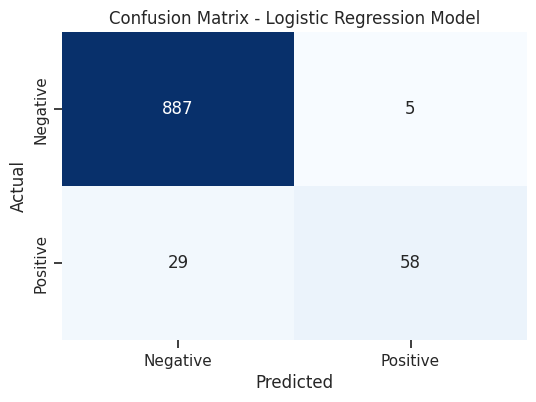

In [32]:
# Plotar a matriz de confusão para cada modelo
plot_confusion_matrix(conf_matrix_logreg, 'Logistic Regression Model')

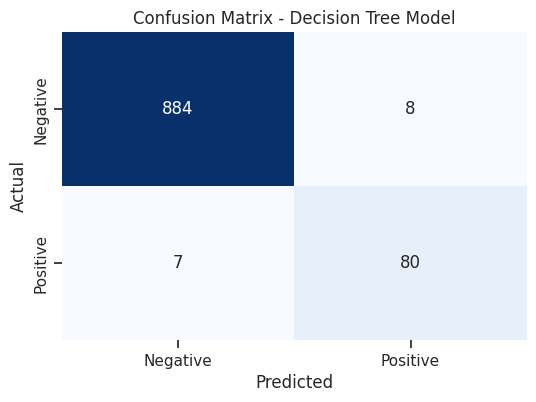

In [33]:
# Plotar a matriz de confusão para cada modelo
plot_confusion_matrix(conf_matrix_dt, 'Decision Tree Model')

In [34]:
# Por meio da matriz de confusão, o modelo de decision tree continua sendo
# superior em relação ao modelo logístico.

> Além da acurácia, existem várias métricas importantes para avaliar a qualidade de um modelo de classificação. Algumas das métricas mais comumente usadas incluem:
>
> - **Precisão (Precision):** A precisão é a proporção de resultados positivos corretos em relação a todos os resultados positivos previstos pelo modelo. Ela é útil quando o foco está em minimizar os falsos positivos. Uma alta precisão indica que o modelo tem baixa taxa de falsos positivos.
>
> - **Recall (Sensibilidade ou Revocação):** O recall é a proporção de resultados positivos corretos em relação a todos os resultados positivos reais. É útil quando o foco está em minimizar os falsos negativos. Um alto recall indica que o modelo tem baixa taxa de falsos negativos.
>
> - **F1-score:** O F1-score é a média harmônica entre a precisão e o recall. É uma métrica útil para equilibrar a precisão e o recall em casos em que ambas as métricas são importantes.
>
> - **Matriz de Confusão:** A matriz de confusão fornece uma visão mais detalhada do desempenho do modelo, mostrando o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Ela pode ajudar a identificar quais tipos de erros o modelo está cometendo.
>
> - **Curva ROC e Área sob a Curva ROC (AUC-ROC):** A curva ROC (Receiver Operating Characteristic) mostra a taxa de verdadeiros positivos em relação à taxa de falsos positivos para diferentes limiares de classificação. A AUC-ROC é uma métrica que representa a área sob a curva ROC e é útil para avaliar o desempenho geral do modelo, independentemente do limiar de classificação.
>

In [35]:
# Para verificar tais métricas:

from sklearn.metrics import classification_report

# Obtendo as previsões dos modelos
dummy_preds = dummy_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Classification report para o modelo Dummy Classifier
print("Classification Report - Dummy Classifier:")
print(classification_report(y_test, dummy_preds))

# Classification report para o modelo Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, logreg_preds))

# Classification report para o modelo Decision Tree
print("Classification Report - Decision Tree:")
print(classification_report(y_test, dt_preds))


Classification Report - Dummy Classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       892
           1       0.00      0.00      0.00        87

    accuracy                           0.91       979
   macro avg       0.46      0.50      0.48       979
weighted avg       0.83      0.91      0.87       979

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1       0.92      0.67      0.77        87

    accuracy                           0.97       979
   macro avg       0.94      0.83      0.88       979
weighted avg       0.96      0.97      0.96       979

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.91      0.92      0.91        87

    accuracy                           0.98       979
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


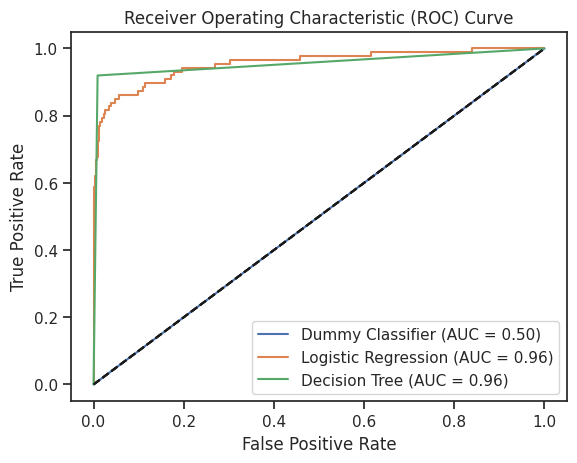

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Função para plotar a curva ROC
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para um classificador aleatório
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

# Obtendo as probabilidades das classes positivas
dummy_probs = dummy_model.predict_proba(X_test)[:, 1]
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Plotando a curva ROC para cada modelo
plot_roc_curve(y_test, dummy_probs, label='Dummy Classifier')
plot_roc_curve(y_test, logreg_probs, label='Logistic Regression')
plot_roc_curve(y_test, dt_probs, label='Decision Tree')

# Exibindo o gráfico
plt.show()


Por meio da curva ROC-AUC, consigo perceber qual modelo se sai melhor na taxa de verdadeiros positivos, de modo que me retorna um valor AUC sobre cada modelo.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Obtendo as previsões dos modelos
logreg_preds = logreg_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Calculando as métricas
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_f1_score = f1_score(y_test, logreg_preds)
logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1_score = f1_score(y_test, dt_preds)
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Criando o DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [logreg_accuracy, dt_accuracy],
    'Precision': [logreg_precision, dt_precision],
    'Recall': [logreg_recall, dt_recall],
    'F1-score': [logreg_f1_score, dt_f1_score],
    'ROC AUC': [logreg_roc_auc, dt_roc_auc]
})

# Arredondando as métricas para duas casas decimais
metrics_df = metrics_df.round(2)

# Exibindo o DataFrame
metrics_df

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.97,0.92,0.67,0.77,0.96
1,Decision Tree,0.98,0.91,0.92,0.91,0.96


Havendo feito o modelo, pode-se supor que eles estão bom, em especial sobrea as suas capacidades de generalização? Então, para que se tenha uma boa generalização é recomendado que realize uma validação cruzada, de modo que os dados não são apenas segmentados em treino e teste, mas em blocos, chamados de folds, nos quais em cada qual haverá uma etapa de treino e teste. Os resultados de cada validação cruzada nesses folds são somados e tirados a média, como forma de aferir a qualidade do modelo.

- Explicação sobre validação cruzada:

A validação cruzada (cross-validation) é uma técnica utilizada em machine learning para avaliar o desempenho de um modelo de forma mais robusta e confiável. Em vez de simplesmente dividir o conjunto de dados em apenas um conjunto de treinamento e um conjunto de teste, a validação cruzada envolve dividir o conjunto de dados em várias partes (chamadas de folds) e executar o processo de treinamento e teste em cada uma dessas partes. Essa divisão em conjuntos de treinamento e teste pode ser feita de várias maneiras, sendo o K-Fold Cross-Validation e o Stratified K-Fold Cross-Validation duas abordagens comumente utilizadas.

No K-Fold Cross-Validation, o conjunto de dados é dividido em K partes iguais (chamadas de folds ou dobras). O modelo é treinado K vezes, cada vez usando K-1 folds como conjunto de treinamento e 1 fold como conjunto de teste. O desempenho do modelo é calculado como a média dos resultados obtidos em cada iteração.

Já no Stratified K-Fold Cross-Validation, a divisão dos dados em folds é feita de forma a preservar a proporção de classes em cada fold. Isso é especialmente útil quando se lida com problemas de classificação em que as classes não estão balanceadas no conjunto de dados. O objetivo é garantir que cada fold represente adequadamente a distribuição de classes do conjunto de dados original.

Em resumo, enquanto o K-Fold Cross-Validation divide o conjunto de dados em partes iguais, o Stratified K-Fold Cross-Validation leva em consideração a distribuição de classes ao realizar essa divisão. Ambas as abordagens são úteis para avaliar o desempenho de modelos de machine learning e escolher os melhores hiperparâmetros, mas o Stratified K-Fold Cross-Validation é mais recomendado quando se lida com classes desbalanceadas.

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Definindo o número de divisões e a estratégia de embaralhamento
n_splits = 5
shuffle = True

# Definindo o random state
random_state = 42

# Definindo a estratégia de validação cruzada
cv = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

# Realizando a validação cruzada para o modelo Logistic Regression
logreg_scores = cross_validate(logreg_model, X, y, cv=cv, scoring='roc_auc', return_train_score=True)

# Obtendo os valores de AUC para cada divisão para os dados de treino e teste
logreg_train_auc = logreg_scores['train_score']
logreg_test_auc = logreg_scores['test_score']

# Calculando a média e o desvio-padrão do AUC para os dados de treino e teste
logreg_train_mean_auc = logreg_train_auc.mean()
logreg_train_std_auc = logreg_train_auc.std()
logreg_test_mean_auc = logreg_test_auc.mean()
logreg_test_std_auc = logreg_test_auc.std()

# Exibindo os resultados da validação cruzada para o modelo Logistic Regression
print("Logistic Regression Cross-Validation Results:")
print(f"Train AUC: {logreg_train_mean_auc:.4f} +/- {logreg_train_std_auc:.4f}")
print(f"Test AUC: {logreg_test_mean_auc:.4f} +/- {logreg_test_std_auc:.4f}")

# Realizando a validação cruzada para o modelo Decision Tree
dt_scores = cross_validate(dt_model, X, y, cv=cv, scoring='roc_auc', return_train_score=True)

# Obtendo os valores de AUC para cada divisão para os dados de treino e teste
dt_train_auc = dt_scores['train_score']
dt_test_auc = dt_scores['test_score']

# Calculando a média e o desvio-padrão do AUC para os dados de treino e teste
dt_train_mean_auc = dt_train_auc.mean()
dt_train_std_auc = dt_train_auc.std()
dt_test_mean_auc = dt_test_auc.mean()
dt_test_std_auc = dt_test_auc.std()

# Exibindo os resultados da validação cruzada para o modelo Decision Tree
print("\nDecision Tree Cross-Validation Results:")
print(f"Train AUC: {dt_train_mean_auc:.4f} +/- {dt_train_std_auc:.4f}")
print(f"Test AUC: {dt_test_mean_auc:.4f} +/- {dt_test_std_auc:.4f}")


Logistic Regression Cross-Validation Results:
Train AUC: 0.9613 +/- 0.0025
Test AUC: 0.9594 +/- 0.0106

Decision Tree Cross-Validation Results:
Train AUC: 1.0000 +/- 0.0000
Test AUC: 0.9482 +/- 0.0215


Note que o resultado de treino para a árvore de decisão foi de 1, o que significa? Que, sim, o modelo está com problema de overfitting, pois é muito dificil que qualquer modelo apresente uma taxa de 100% de acertos e, se ele estiver de fato sobre-treinado, interfere negativamente na sua respectiva generalização. Para tanto, deve-se manipular o modelo, de modo que os dados a serem analisados fiquem balanceados, além de utilizar-se de outros parâmetros que impeder que a árvore realize o overfit.

- Técnicas de balanceamento dos dado:

>Existem várias técnicas para balancear os dados em um problema de classificação de machine learning quando há um desequilíbrio significativo entre as classes. Algumas das técnicas mais comumente utilizadas incluem:
>
> - **Undersampling (subamostragem):** Consiste em reduzir aleatoriamente a quantidade de exemplos da classe majoritária para igualá-la à quantidade de exemplos da classe minoritária. Isso pode ser feito removendo aleatoriamente exemplos da classe majoritária. Bibliotecas como imbalanced-learn (imblearn) podem ser utilizadas para aplicar essa técnica.
>
> - **Oversampling (supera-amostragem):** Consiste em aumentar a quantidade de exemplos da classe minoritária para igualá-la à quantidade de exemplos da classe majoritária. Isso pode ser feito replicando aleatoriamente exemplos da classe minoritária. A biblioteca imbalanced-learn (imblearn) oferece métodos para realizar oversampling, como SMOTE (Synthetic Minority Over-sampling Technique) e ADASYN (Adaptive Synthetic Sampling).
>
> - **Combinação de Undersampling e Oversampling:** Também é possível combinar as técnicas de undersampling e oversampling para obter um balanceamento mais efetivo. Isso pode ser feito removendo exemplos da classe majoritária e replicando exemplos da classe minoritária. A biblioteca imbalanced-learn oferece métodos que combinam essas abordagens, como SMOTEENN e SMOTETomek.
>
> - **Penalização na função de custo:** Alguns algoritmos de machine learning possuem parâmetros que permitem penalizar de forma diferente os erros nas classes majoritária e minoritária durante o treinamento. Por exemplo, é possível ajustar os pesos das classes ou usar métodos como a técnica de custo sensível (cost-sensitive learning). Bibliotecas como Scikit-learn (sklearn) possuem suporte para configurar a penalização na função de custo.
>
>Essas são apenas algumas das técnicas comumente utilizadas para balancear os dados em problemas de classificação de machine learning. As bibliotecas mencionadas, como imbalanced-learn e Scikit-learn, oferecem ferramentas e métodos prontos para aplicar essas técnicas de forma conveniente e eficiente. É importante avaliar qual técnica é mais adequada para o seu problema e realizar experimentos para encontrar o melhor equilíbrio entre as classes.

In [39]:
# Começando o balanceamento:

from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [40]:
# Verificando se o balanceamento, conforme a técnica adotada
# foi utilizada:

y_train_balanced.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: Personal Loan, dtype: float64

In [41]:
# Retreinando com os dados de treino balanceados:

# Treinar o modelo de regressão logística com os dados balanceados
logreg_model_balanced = LogisticRegression()
logreg_model_balanced.fit(X_train_balanced, y_train_balanced)

# Obter as previsões do modelo de regressão logística nos dados de teste
logreg_preds_balanced = logreg_model_balanced.predict(X_test)

# Calcular e imprimir a acurácia do modelo de regressão logística balanceado
logreg_accuracy_balanced = accuracy_score(y_test, logreg_preds_balanced)
print("Acurácia do modelo de regressão logística balanceado: {:.2f}%".format(logreg_accuracy_balanced * 100))

# Treinar o modelo de árvore de decisão com os dados balanceados
dt_model_balanced = DecisionTreeClassifier()
dt_model_balanced.fit(X_train_balanced, y_train_balanced)

# Obter as previsões do modelo de árvore de decisão nos dados de teste
dt_preds_balanced = dt_model_balanced.predict(X_test)

# Calcular e imprimir a acurácia do modelo de árvore de decisão balanceado
dt_accuracy_balanced = accuracy_score(y_test, dt_preds_balanced)
print("Acurácia do modelo de árvore de decisão balanceado: {:.2f}%".format(dt_accuracy_balanced * 100))

Acurácia do modelo de regressão logística balanceado: 90.91%
Acurácia do modelo de árvore de decisão balanceado: 98.16%


Importante lembrar que a acurácia não é a única métrica com a qual eu devo analisar um modelo, mas apenas uma das, cabendo também a matriz de confusão e o método report, que me traz a precisão, o recall, que se refere a quanto o modelo acerta percentualmente os positivos em relação ao seu universo, bem como a média harmônica.

Algo que vale comentar é a acurácia da árvore e do modelo de regressão logísitca. Nota-se que a última diminui em relação ao o que havia outrora, enquanto que a primeira se mantém semelhante ao modelo com os dados não balanceados, por quê? Bom, isso ocorre porque ao contrário do modelo de regressão logística as árvores de decisão não são tão sucetíveis ao balanceamento, de modo que conseguem identificar padrões por outras formas mais complexas, além de estar circunscrita a um contexto de overfiting, que necessita de atenção.

- Analisando a matriz de confusão dos modelos gerados com os dados balanceados:

In [44]:
# Obtendo as previsões dos modelos após o balanceamento
logreg_balanced_preds = logreg_model_balanced.predict(X_test)
dt_balanced_preds = dt_model_balanced.predict(X_test)

# Plotando as matrizes de confusão para os modelos após o balanceamento
plot_confusion_matrix(y_test, logreg_balanced_preds, title='Logistic Regression Confusion Matrix (Balanced)')
plot_confusion_matrix(y_test, dt_balanced_preds, title='Decision Tree Confusion Matrix (Balanced)')


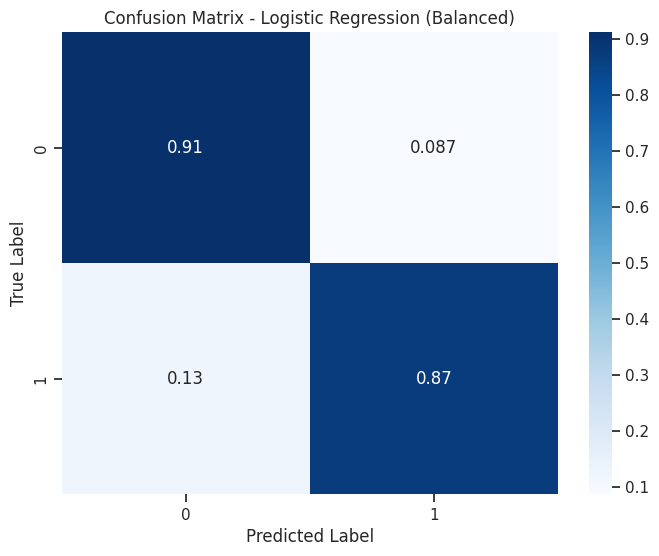

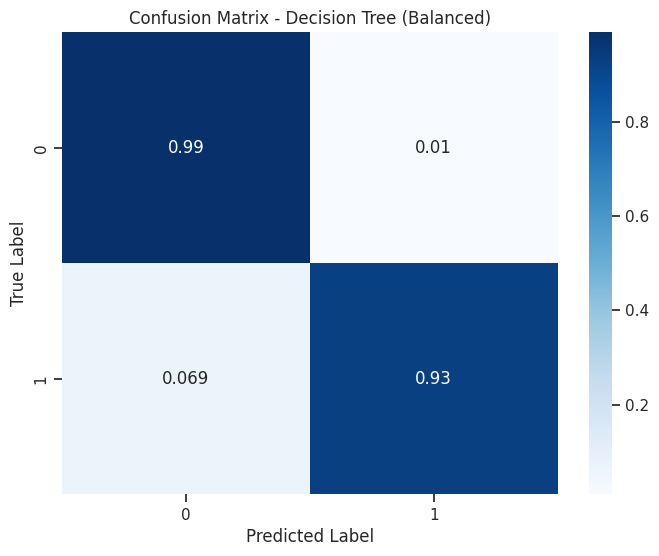

A partir da análise da matriz, ao meu ver, nota-se que a árvore parece apresentar ainda um overfiting.

In [45]:
# Analisando as outras métricas:

# Obtendo os relatórios de classificação para os modelos após o balanceamento
logreg_balanced_report = classification_report(y_test, logreg_balanced_preds)
dt_balanced_report = classification_report(y_test, dt_balanced_preds)

# Imprimindo os relatórios de classificação
print("Classification Report - Logistic Regression (Balanced):")
print(logreg_balanced_report)
print()

print("Classification Report - Decision Tree (Balanced):")
print(dt_balanced_report)

Classification Report - Logistic Regression (Balanced):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       892
           1       0.49      0.87      0.63        87

    accuracy                           0.91       979
   macro avg       0.74      0.89      0.79       979
weighted avg       0.94      0.91      0.92       979


Classification Report - Decision Tree (Balanced):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.87      0.93      0.90        87

    accuracy                           0.98       979
   macro avg       0.93      0.96      0.94       979
weighted avg       0.98      0.98      0.98       979



Nota-se que a o modelo de regressão logística possui um baixo nível de precisão para classes do tipo 1, ou seja, para aquelas que se referem a pessoa ter adquirido em empréstimo pessoal. Por quê? Bom, isso ocorre por conta da disponibilidade dos dados, mesmo que esses sejam balanceados. Porém, há uma forma de melhorar o modelo:

In [46]:
# Definir diferentes pesos para as classes
class_weights = [{0: 1, 1: 1},  # Pesos iguais para ambas as classes
                 {0: 5, 1: 1},  # Peso maior para a classe 0
                 {0: 10, 1: 1}]  # Peso ainda maior para a classe 0

# Iterar sobre os diferentes pesos
for weights in class_weights:
    # Criar o modelo Logistic Regression com os pesos das classes
    model = LogisticRegression(class_weight=weights)

    # Treinar o modelo
    model.fit(X_train_balanced, y_train_balanced)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Obter o classification report
    report = classification_report(y_test, y_pred)

    # Imprimir o classification report com os pesos utilizados
    print(f"Classification Report (Weights={weights}):")
    print(report)
    print("----------------------------------------")


Classification Report (Weights={0: 1, 1: 1}):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       892
           1       0.49      0.87      0.63        87

    accuracy                           0.91       979
   macro avg       0.74      0.89      0.79       979
weighted avg       0.94      0.91      0.92       979

----------------------------------------
Classification Report (Weights={0: 5, 1: 1}):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       892
           1       0.80      0.77      0.78        87

    accuracy                           0.96       979
   macro avg       0.89      0.88      0.88       979
weighted avg       0.96      0.96      0.96       979

----------------------------------------
Classification Report (Weights={0: 10, 1: 1}):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1    

Note a precisão para os itens de classe 1 melhorou em comparação ao que havia antes, mas por quê?

> Ao atribuir um peso maior para a classe 0 e um peso menor para a classe 1, você está informando ao modelo que a classe 0 é mais importante em termos de métricas de avaliação, como precisão, recall e F1-score.
>
>Essa abordagem pode ser útil em situações onde a classe minoritária (classe 1) é de maior interesse e você deseja minimizar falsos negativos, ou seja, prever corretamente os casos positivos. Ao aumentar o peso da classe 0, você está penalizando mais os erros de classificação nessa classe, incentivando o modelo a se concentrar em prever corretamente a classe 1, resultando em uma melhora na precisão e recall dessa classe.
>
>Por outro lado, ao atribuir um peso maior para a classe 1 e um peso menor para a classe 0, você estaria enfatizando mais a detecção da classe minoritária em detrimento da classe majoritária. Essa abordagem pode ser útil em casos onde você deseja minimizar os falsos positivos, ou seja, prever corretamente os casos negativos. No entanto, essa configuração não resultou em uma melhoria no seu caso específico.
>
>É importante ressaltar que a escolha dos pesos das classes depende do objetivo do problema e da importância relativa das classes na sua aplicação específica. Experimentar diferentes combinações de pesos e avaliar o desempenho do modelo em métricas relevantes pode ajudar a determinar a configuração mais adequada

In [47]:
# Melhorando os hiperparâmetros da árvore:

from sklearn.model_selection import GridSearchCV

# Defina os hiperparâmetros a serem testados
parameters = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Crie o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Realize a busca em grade com validação cruzada
grid_search = GridSearchCV(dt_model, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Obtenha os melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Avalie o desempenho do modelo com os melhores parâmetros nos dados de treino e teste
dt_model_best = grid_search.best_estimator_
train_auc = roc_auc_score(y_train, dt_model_best.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, dt_model_best.predict_proba(X_test)[:, 1])

print("AUC nos dados de treino:", train_auc)
print("AUC nos dados de teste:", test_auc)

Melhores parâmetros encontrados: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
AUC nos dados de treino: 0.9970616570327553
AUC nos dados de teste: 0.9970813360136075


In [48]:
# Obtendo as previsões do modelo nos dados de teste
dt_preds = dt_model_best.predict(X_test)

# Calculando o classification report
classification_rep = classification_report(y_test, dt_preds)

# Exibindo o classification report
print("Classification Report - Decision Tree:")
print(classification_rep)


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979

